# Análise exploratória de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/data.csv')
dictionary = pd.read_csv('../data/external/dictionary.csv')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Descrição dos dados

**Tips** é um dataset disponível no rdrr.io que foi retirado do livro "Practical Data Analysis: Case Studies in Business Statistics". Feito por um garçom que registrou informações sobre cada gorjeta que recebeu ao longo de um período de alguns meses trabalhando em um restaurante. O conjunto de dados conta com 244 linhas e 7 variáveis, são elas:
- **total_bill:** Valor da conta em dólar
- **tip:** Valor da gorjeta em dólar
- **sex:** Sexo do pagador da conta
- **smoker:** Existência de fumante na festa
- **day:** Dia da semana
- **time:** Horário do dia
- **size:** Tamanho da mesa

### Dicionário de Dados

In [5]:
dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Valor da conta em dólar,quantitativa,continua
1,tip,Valor da gorjeta em dolár,quantitativa,continua
2,sex,Sexo do pagador da conta,qualitativa,nominal
3,smoker,Fumante na festa,qualitativa,nominal
4,day,Dia da semana,qualitativa,nominal
5,time,Horário do dia,qualitativa,nominal
6,size,Tamanho da mesa,quantitativa,discreta


In [6]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [7]:
df.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

### Dados faltantes:

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Há 0 dados faltantes no dataset.

---

### Verificando linhas duplicadas:

In [9]:
df.duplicated().sum()

1

#### Removendo linhas duplicadas

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

---

In [12]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


- O sexo que mais compra são os homens
- O dia mais movimentado é o sabado
- O horário mais movimentado é a noite

## 2. Perguntas de partida e hipóteses

- Qual a relação entre o total da conta e gorjeta recebida ?
- Qual a frequência e valor total dos dois sexos ?
- Qual a frequência e valor total entre fumantes e não fumantes ?
- Qual a distribuição das gorjetas nos dias da semana ?
- Qual a distribuição das gorjetas nos diferentes horários do dia ?
- O tamanho da mesa influencia na gorjeta recebida ?
- Há mais presença de fumantes em qual sexo ? Essa influencia surte efeito na gorjeta recebida ?

## 3. Insights

### Qual a relação entre o total da conta e gorjeta recebida ?

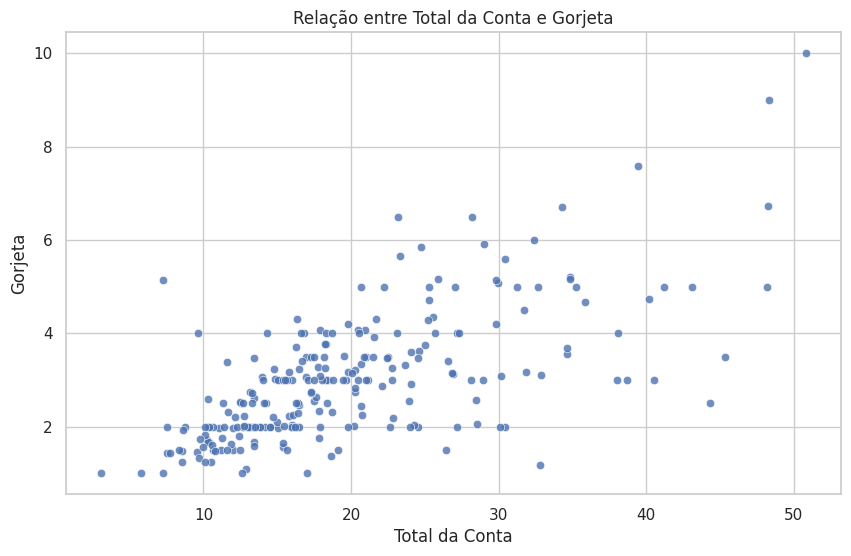

Correlação de Pearson: 0.6749978565456075


In [75]:
# Relação entre total da conta e gorjeta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', palette='cool', alpha=0.8)
plt.title("Relação entre Total da Conta e Gorjeta")
plt.xlabel("Total da Conta")
plt.ylabel("Gorjeta")
plt.show()

# Calculando a correlação entre total_bill e tip
correlacao = df['total_bill'].corr(df['tip'])
print("Correlação de Pearson:", correlacao)

### Qual a frequência e valor total dos dois sexos ?

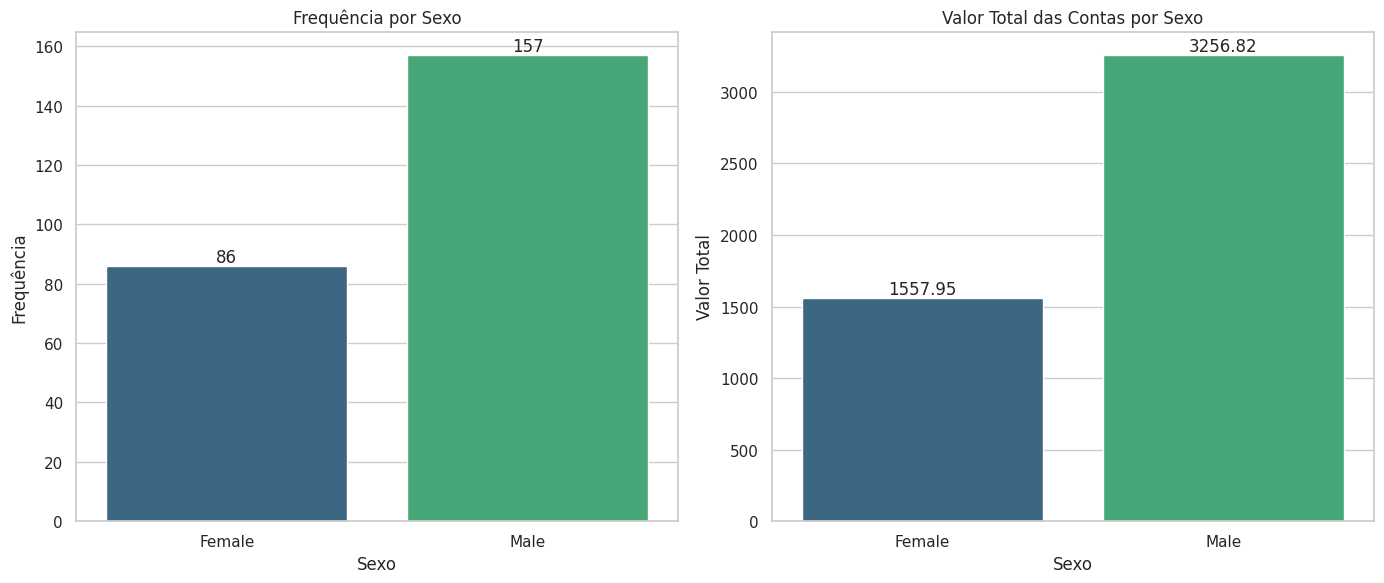

In [78]:
# Configurações iniciais de estilo
sns.set_theme(style="whitegrid")

# Agrupando os dados por sexo
sex_group = df.groupby('sex').agg({'total_bill': ['sum', 'count']}).reset_index()
sex_group.columns = ['sex', 'total_bill_sum', 'frequency']

# Plotando a frequência e valor total por sexo
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de frequência
freq_plot = sns.barplot(data=sex_group, x='sex', y='frequency', ax=ax[0], palette='viridis')
ax[0].set_title("Frequência por Sexo")
ax[0].set_ylabel("Frequência")
ax[0].set_xlabel("Sexo")

# Adicionando rótulos no gráfico de frequência
for container in freq_plot.containers:
    ax[0].bar_label(container, fmt='%d', label_type='edge')

# Gráfico de valor total
valortotal_plot = sns.barplot(data=sex_group, x='sex', y='total_bill_sum', ax=ax[1], palette='viridis')
ax[1].set_title("Valor Total das Contas por Sexo")
ax[1].set_ylabel("Valor Total")
ax[1].set_xlabel("Sexo")

# Adicionando rótulos no gráfico de valor total
for container in valortotal_plot.containers:
    ax[1].bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

### Qual a frequência e valor total de fumantes e não fumantes ?

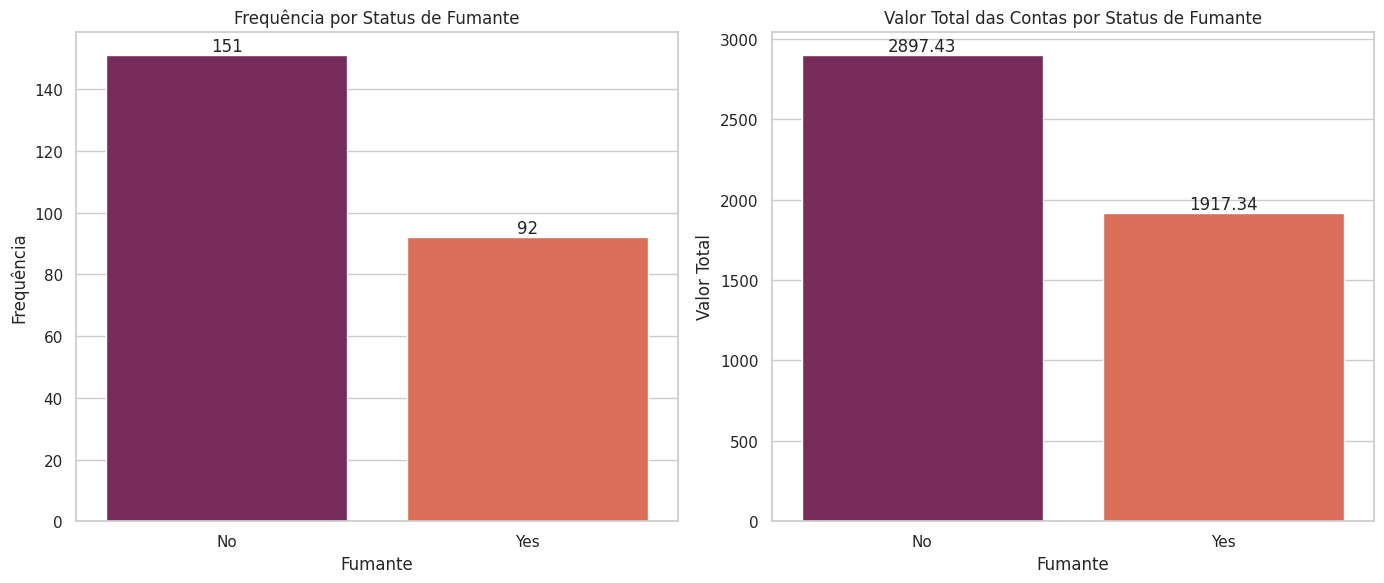

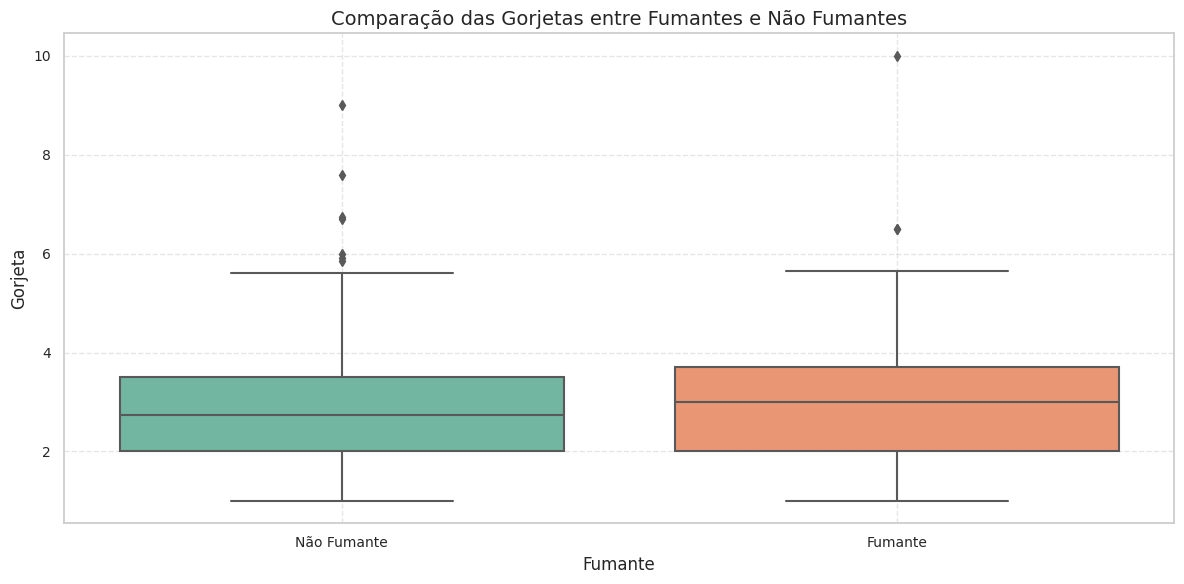

Média das Gorjetas por Tipo de Fumante:
smoker
No     2.991854
Yes    3.019674
Name: tip, dtype: float64


In [83]:
# Agrupando os dados por fumantes
smoker_group = df.groupby('smoker').agg({'total_bill': ['sum', 'count']}).reset_index()
smoker_group.columns = ['smoker', 'total_bill_sum', 'frequency']

# Plotando a frequência e valor total por fumantes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de frequência
freq_plot = sns.barplot(data=smoker_group, x='smoker', y='frequency', ax=ax[0], palette='rocket')
ax[0].set_title("Frequência por Status de Fumante")
ax[0].set_ylabel("Frequência")
ax[0].set_xlabel("Fumante")

# Adicionando rótulos no gráfico de frequência
freq_plot.bar_label(freq_plot.containers[0], fmt='%d', label_type='edge')

# Gráfico de valor total
valortotal_plot = sns.barplot(data=smoker_group, x='smoker', y='total_bill_sum', ax=ax[1], palette='rocket')
ax[1].set_title("Valor Total das Contas por Status de Fumante")
ax[1].set_ylabel("Valor Total")
ax[1].set_xlabel("Fumante")

# Adicionando rótulos no gráfico de valor total
valortotal_plot.bar_label(valortotal_plot.containers[0], fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

# Criando o boxplot para comparar a gorjeta entre fumantes e não fumantes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='smoker', y='tip', palette='Set2')

# Melhorias visuais
plt.title("Comparação das Gorjetas entre Fumantes e Não Fumantes", fontsize=14)
plt.xlabel("Fumante", fontsize=12)
plt.ylabel("Gorjeta", fontsize=12)
plt.xticks([0, 1], ['Não Fumante', 'Fumante'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Calculando a média das gorjetas para fumantes e não fumantes
media_gorjetas_fumantes = df.groupby('smoker')['tip'].mean()
print("Média das Gorjetas por Tipo de Fumante:")
print(media_gorjetas_fumantes)

### Qual a distribuição das gorjetas nos dias da semana ?

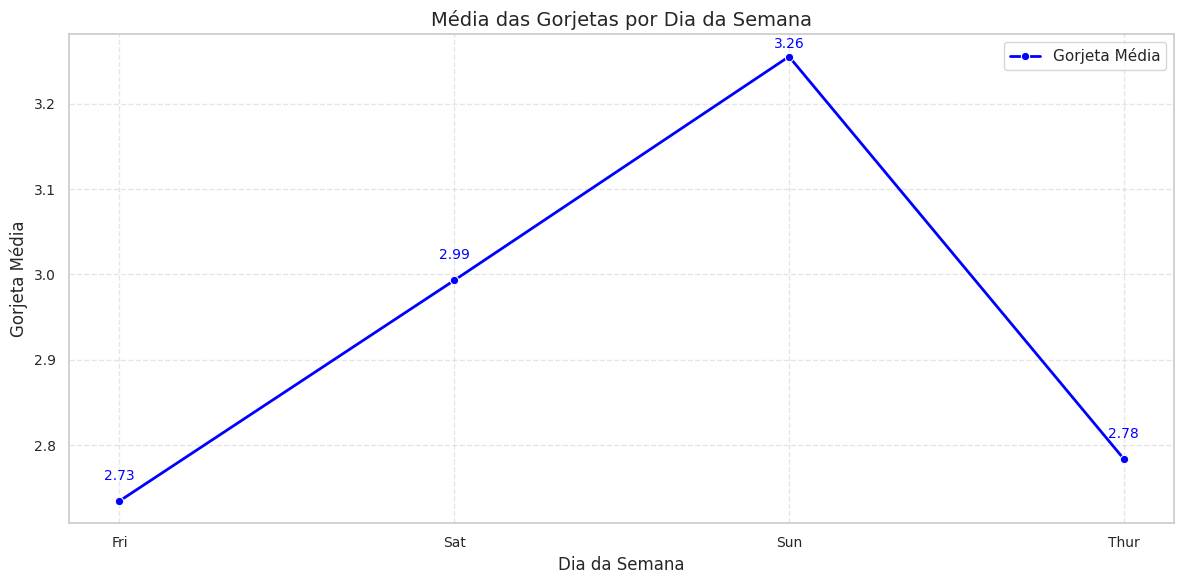

In [84]:
# Calculando a média das gorjetas por dia da semana
media_gorjetas_dia = df.groupby('day')['tip'].mean().reset_index()

# Criando o gráfico de linhas com rótulos
plt.figure(figsize=(12, 6))
sns.lineplot(data=media_gorjetas_dia, x='day', y='tip', marker='o', color='blue', linewidth=2, label='Gorjeta Média')

# Adicionando rótulos nos pontos
for x, y in zip(media_gorjetas_dia['day'], media_gorjetas_dia['tip']):
    if x == "Sun":
        plt.text(x, y + 0.01, f"{y:.2f}", color='blue', ha='center', fontsize=10)
    else:
        plt.text(x, y + 0.025, f"{y:.2f}", color='blue', ha='center', fontsize=10)

# Melhorias visuais
plt.title("Média das Gorjetas por Dia da Semana", fontsize=14)
plt.xlabel("Dia da Semana", fontsize=12)
plt.ylabel("Gorjeta Média", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()

### Qual a distribuição das gorjetas nos diferentes horários do dia ?

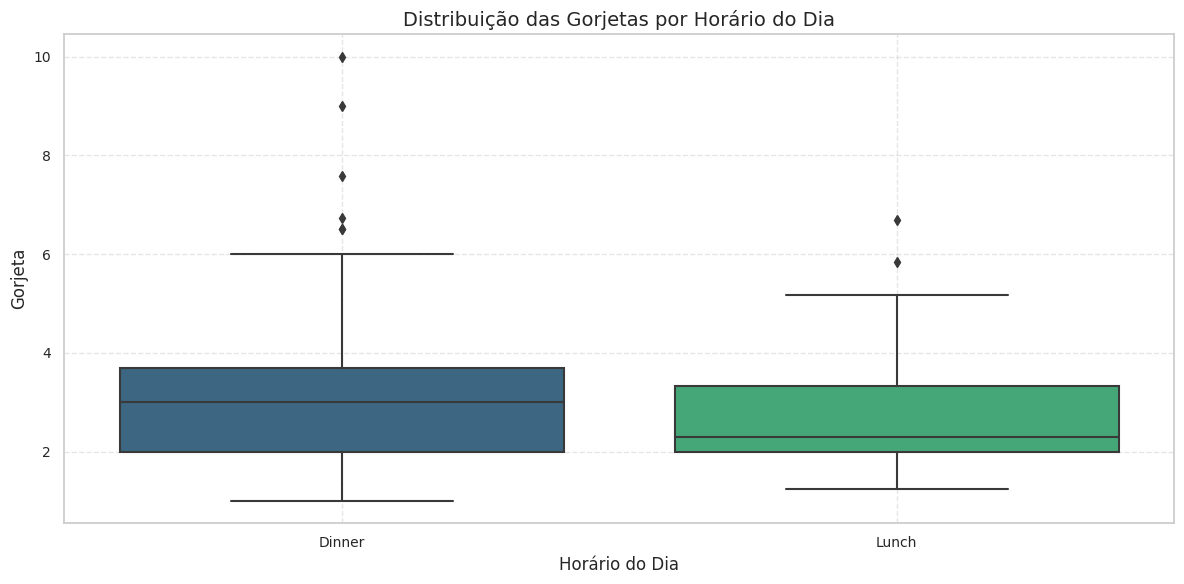

In [85]:
# Criando o boxplot para a distribuição das gorjetas por horário do dia
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='time', y='tip', palette='viridis')

# Melhorias visuais
plt.title("Distribuição das Gorjetas por Horário do Dia", fontsize=14)
plt.xlabel("Horário do Dia", fontsize=12)
plt.ylabel("Gorjeta", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### 

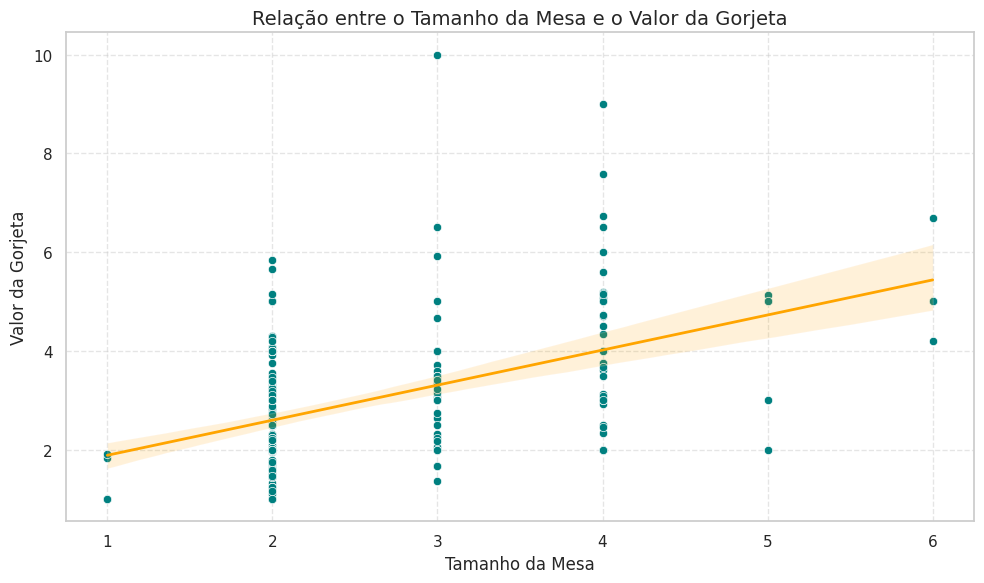

In [86]:
# Criando o gráfico de dispersão para visualizar a relação entre tamanho da mesa e gorjeta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size', y='tip', color='teal')

# Adicionando uma linha de tendência (regressão linear)
sns.regplot(data=df, x='size', y='tip', scatter=False, color='orange', line_kws={'lw': 2})

# Melhorias visuais
plt.title("Relação entre o Tamanho da Mesa e o Valor da Gorjeta", fontsize=14)
plt.xlabel("Tamanho da Mesa", fontsize=12)
plt.ylabel("Valor da Gorjeta", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

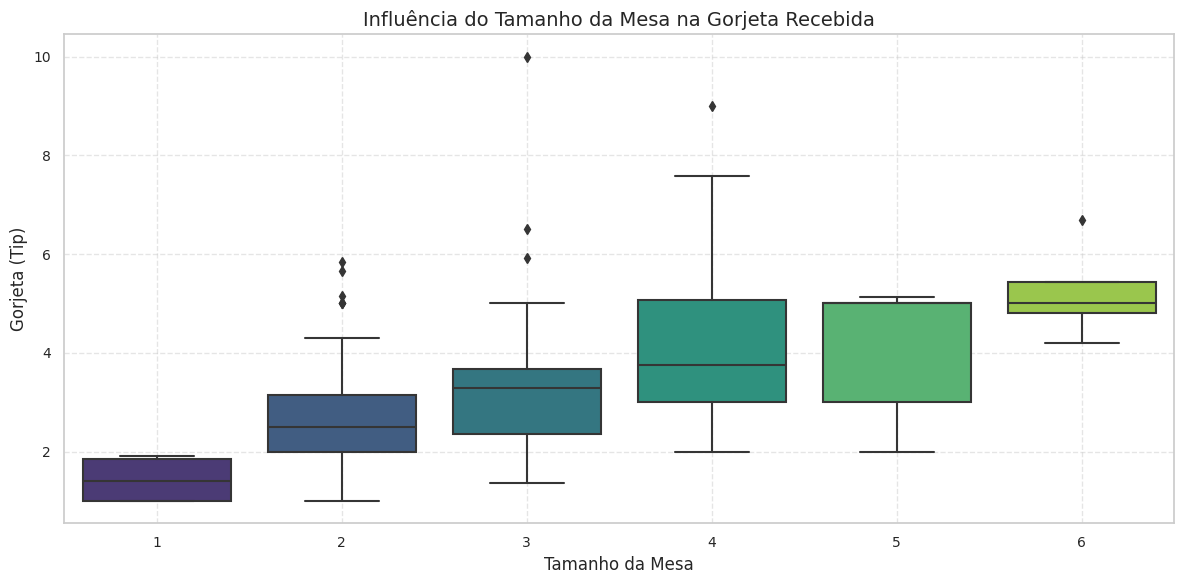

In [20]:
# Criando o boxplot para analisar a influência do tamanho da mesa
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='size', y='tip', palette='viridis')

# Melhorias visuais
plt.title("Influência do Tamanho da Mesa na Gorjeta Recebida", fontsize=14)
plt.xlabel("Tamanho da Mesa", fontsize=12)
plt.ylabel("Gorjeta (Tip)", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [42]:
correlation = df['size'].corr(df['tip'])
print("Correlação entre tamanho da mesa e gorjeta:", correlation)

Correlação entre tamanho da mesa e gorjeta: 0.488400394674884


### Qual a distribuição das gorjetas ?

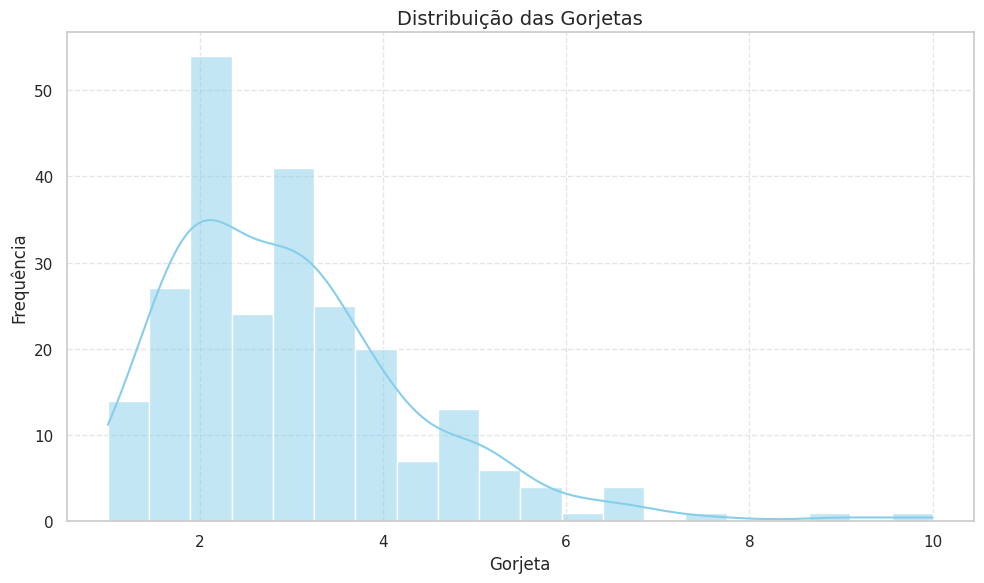

In [71]:
# Criando o histograma das gorjetas
plt.figure(figsize=(10, 6))
sns.histplot(df['tip'], bins=20, kde=True, color='skyblue')

# Melhorando o gráfico
plt.title('Distribuição das Gorjetas', fontsize=14)
plt.xlabel('Gorjeta', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()